In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

# Introduction

The point of this project is to determine whether host countries of the Summer Olympic have a medal winning advantage. To do this, I will analyze the **percentage change of the moving average of the proportion of total medals won by countries** when they host the Olympic event. The proportion of total medals are analysed instead of total number of medals to prevent working with values give an incorrect represenation of how successful a country performs in comparison to the other participating countries; for example: winning 1 medal at where 5 were awarded (20%) is different than winning 3 medals where 30 were awarded (10%). 

The datasets are not in perfect table format, but that is not a problem because not all the data is required for this project so I will just extract what is necessary from each of the three files. 

In the All medalists file, I need to extract the medal won by every athlete, what type of medal, what year the medal was won, and the IOC code of the country the athlete represents. In the Breakdown file, the data I need is the year, the number of medals awarded, and the country hosting the olympics that year. The data in the Country totals I need file is simply the International Olympic Committee (IOC) code for every participating country. 

In [2]:
medals = pd.read_csv('Summer_Olympic_medallists-ALL_MEDALISTS.tsv', sep='\t', skiprows=4)
medals = medals[['Athlete', 'NOC', 'Medal', 'Edition']]

editions = pd.read_csv('Summer_Olympic_medallists-BREAKDOWN.tsv', sep='\t', skiprows=2, nrows = 26)
editions = editions[['Edition', 'Grand Total', 'City', 'Country']]

ioc_codes = pd.read_csv('Summer_Olympic_medallists-COUNTRY_TOTALS.tsv', sep='\t')
ioc_codes = ioc_codes[['Country', 'NOC']].sort_values('NOC')
ioc_codes = ioc_codes.drop_duplicates()

In [3]:
print('--------------Medals')
print(medals.head())
print('---------------Editions')
print(editions.head())
print('--------------IOC codes')
print(ioc_codes.head())

--------------Medals
              Athlete  NOC   Medal  Edition
0       HAJOS, Alfred  HUN    Gold     1896
1    HERSCHMANN, Otto  AUT  Silver     1896
2   DRIVAS, Dimitrios  GRE  Bronze     1896
3  MALOKINIS, Ioannis  GRE    Gold     1896
4  CHASAPIS, Spiridon  GRE  Silver     1896
---------------Editions
   Edition  Grand Total       City         Country
0     1896          151     Athens          Greece
1     1900          512      Paris          France
2     1904          470  St. Louis   United States
3     1908          804     London  United Kingdom
4     1912          885  Stockholm          Sweden
--------------IOC codes
                 Country  NOC
1            Afghanistan  AFG
2  Netherlands Antilles*  AHO
3                Algeria  ALG
4            Australasia  ANZ
5              Argentina  ARG


## Part I
Find the proportion of awarded medals by each country. First find the total number of medals awarded at every event as a series (to be used for division later). Second create a pivot table with the medals dataframe of the number of medals won by each country during each event. Each row represents a single medal won so I will use a count aggregate function

## Part 2
Find the percentage change in rolling average proportion of medals won by each country every year. For each country: calculate proportion of medals won, calculate rolling average, calculate percentage change by each year

## Part 3
Get the values of the table in the above part for hosting countries. First get the IOC code of the hosting country at every olympic event and inner join with the <u>percentage change in rolling average proportion of medals won by each country every year</u> table


In [4]:
#Part 1
totals = editions.set_index('Edition')
totals = totals['Grand Total']
print(totals.head())
medal_counts = medals.pivot_table(index='Edition', values='Athlete', columns='NOC', aggfunc='count')
medal_counts.head()

Edition
1896    151
1900    512
1904    470
1908    804
1912    885
Name: Grand Total, dtype: int64


NOC,AFG,AHO,ALG,ANZ,ARG,ARM,AUS,AUT,AZE,BAH,...,URS,URU,USA,UZB,VEN,VIE,YUG,ZAM,ZIM,ZZX
Edition,,,,,,,,,,,,,,,,,,,,,
1896,NaN,NaN,NaN,NaN,NaN,NaN,2.0,5.0,NaN,NaN,...,NaN,NaN,20.0,NaN,NaN,NaN,NaN,NaN,NaN,6.0
1900,NaN,NaN,NaN,NaN,NaN,NaN,5.0,6.0,NaN,NaN,...,NaN,NaN,55.0,NaN,NaN,NaN,NaN,NaN,NaN,34.0
1904,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,...,NaN,NaN,394.0,NaN,NaN,NaN,NaN,NaN,NaN,8.0
1908,NaN,NaN,NaN,19.0,NaN,NaN,NaN,1.0,NaN,NaN,...,NaN,NaN,63.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1912,NaN,NaN,NaN,10.0,NaN,NaN,NaN,14.0,NaN,NaN,...,NaN,NaN,101.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
#Part 2
fractions = medal_counts.divide(totals, axis='rows')
fractions_changing = fractions.expanding().mean()
fractions_changing = fractions_changing.pct_change()*100
fractions_changing.head()

NOC,AFG,AHO,ALG,ANZ,ARG,ARM,AUS,AUT,AZE,BAH,...,URS,URU,USA,UZB,VEN,VIE,YUG,ZAM,ZIM,ZZX
Edition,,,,,,,,,,,,,,,,,,,,,
1896,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1900,NaN,NaN,NaN,NaN,NaN,NaN,-13.134766,-32.304688,NaN,NaN,...,NaN,NaN,-9.448242,NaN,NaN,NaN,NaN,NaN,NaN,33.561198
1904,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,-30.169386,NaN,NaN,...,NaN,NaN,199.651245,NaN,NaN,NaN,NaN,NaN,NaN,-22.642384
1908,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,-23.013510,NaN,NaN,...,NaN,NaN,-19.549222,NaN,NaN,NaN,NaN,NaN,NaN,0.000000
1912,NaN,NaN,NaN,-26.092774,NaN,NaN,0.000000,6.254438,NaN,NaN,...,NaN,NaN,-12.105733,NaN,NaN,NaN,NaN,NaN,NaN,0.000000


In [6]:
#Part 3
hosts = pd.merge(editions, ioc_codes, how='left', on='Country')
hosts = hosts[['Edition','NOC']]
hosts = hosts.set_index("Edition")[['NOC']]
print(hosts.loc[hosts.NOC.isnull()])

# I used google to find the NOC codes for the countries of the years with blank NOC values
hosts.loc[1972, 'NOC'] = 'FRG'
hosts.loc[1980, 'NOC'] = 'URS'
hosts.loc[1988, 'NOC'] = 'KOR'
hosts = hosts.reset_index()
print('-----------hosts')
print(hosts.head())

         NOC
Edition     
1972     NaN
1980     NaN
1988     NaN
-----------hosts
   Edition  NOC
0     1896  GRE
1     1900  FRA
2     1904  USA
3     1908  GBR
4     1912  SWE


In [7]:
# Using pd.melt to reshape fractions_changing into: Edition, country, value
x = fractions_changing.reset_index()
reshaped = pd.melt(x, id_vars='Edition')

In [8]:
merged = pd.merge(reshaped, hosts, how='inner') # reshaped and hosts have no index
print(merged.head())

# Set Index of merged and sort it: influence
influence = merged.set_index('Edition').sort_index()
print(influence)

   Edition  NOC      value
0     1956  AUS  54.615063
1     2000  AUS  12.554986
2     1920  BEL  54.757887
3     1976  CAN  -2.143977
4     2008  CHN  13.251332
         NOC       value
Edition                 
1896     GRE         NaN
1900     FRA  198.002486
1904     USA  199.651245
1908     GBR  134.489218
1912     SWE   71.896226
1920     BEL   54.757887
1924     FRA    2.046362
1928     NED   36.315243
1932     USA    3.739184
1936     GER   24.108011
1948     GBR   -3.635059
1952     FIN    0.121662
1956     AUS   54.615063
1960     ITA    5.596174
1964     JPN   23.526654
1968     MEX    7.546289
1972     FRG   35.228623
1976     CAN   -2.143977
1980     URS    9.538213
1984     USA    1.304939
1988     KOR   70.070727
1992     ESP   32.943248
1996     USA   -1.010378
2000     AUS   12.554986
2004     GRE   -2.478635
2008     CHN   13.251332


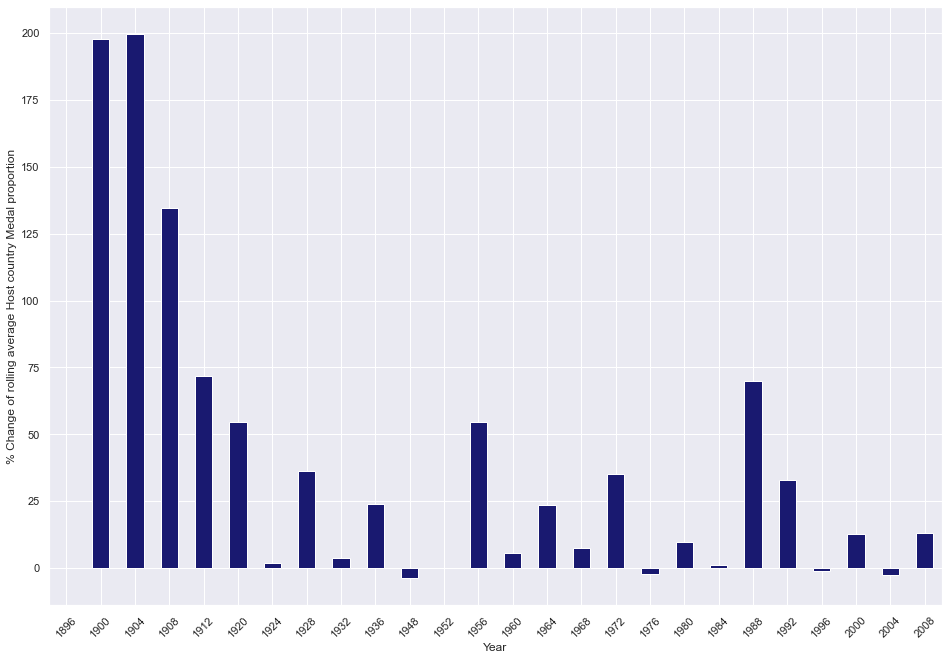

In [9]:
plt.figure(figsize=(16, 11))

ax = influence['value'].plot(kind='bar', color = "midnightblue")
ax.set_xlabel("Year")
ax.set_ylabel("% Change of rolling average Host country Medal proportion")
ax.set_xticklabels(influence['value'].index, rotation=45)
#plt.savefig("Medal % chart.jpg")
plt.show()

## Bar plots of % change for host country in every Olympic event
This series of graphs shows the history of the % change of medals won for every host country to see if the percentage change values in the above graph are significant

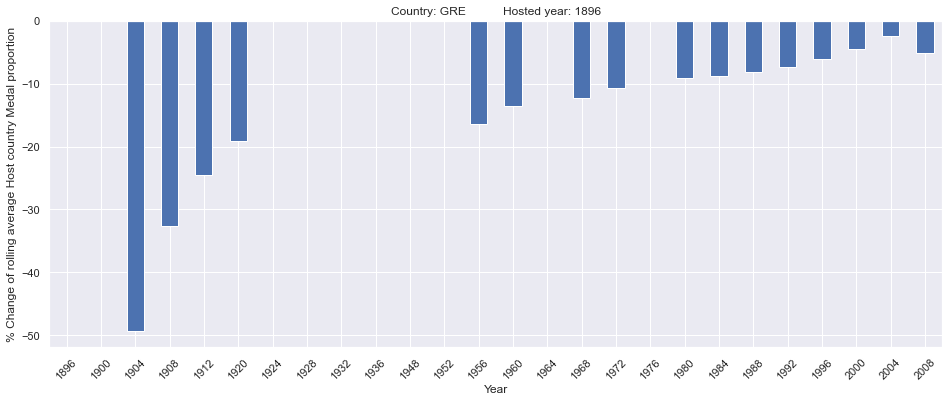

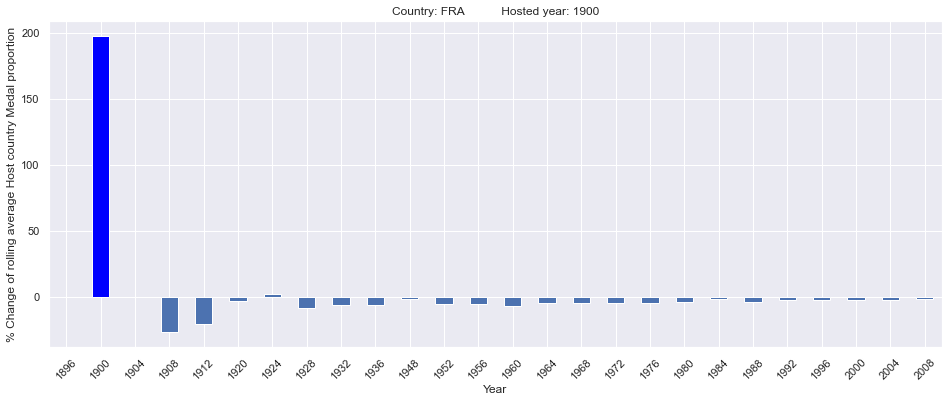

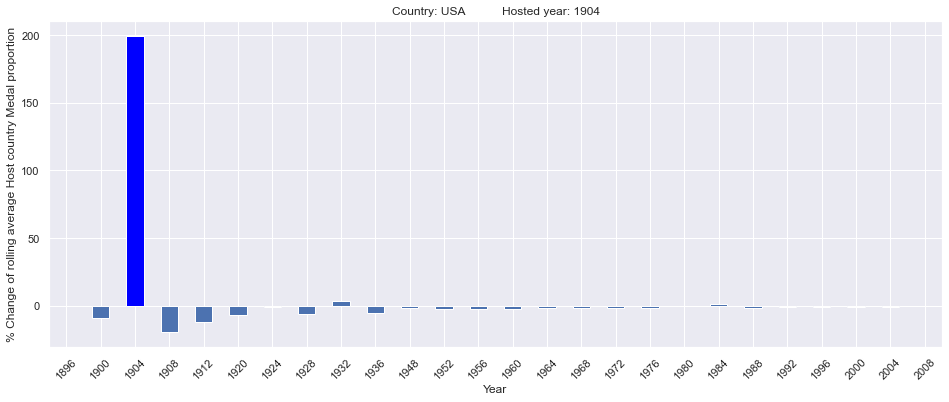

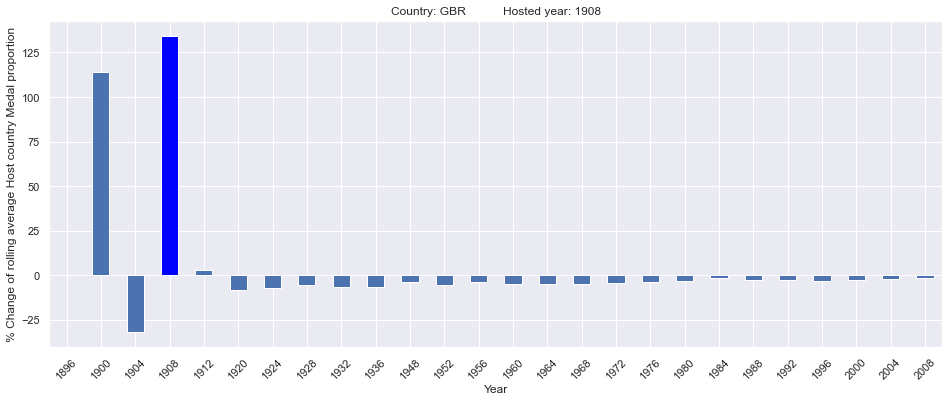

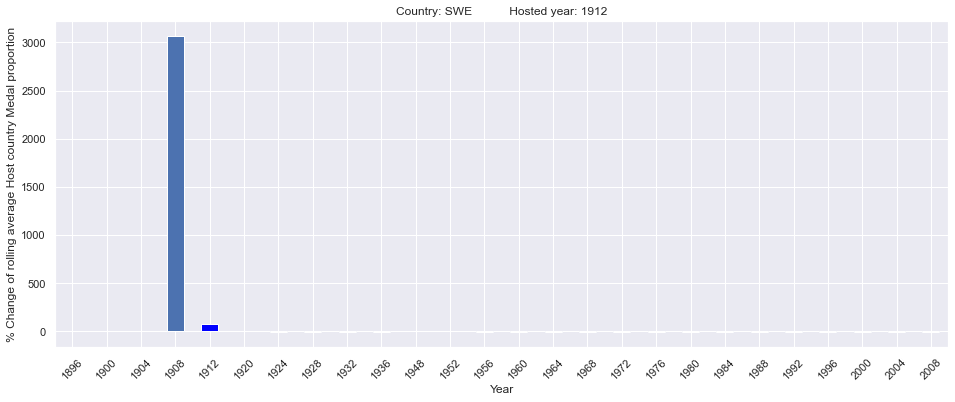

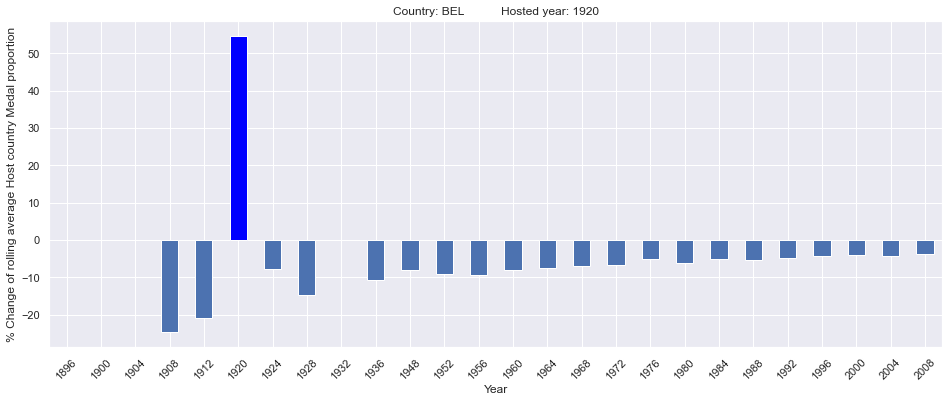

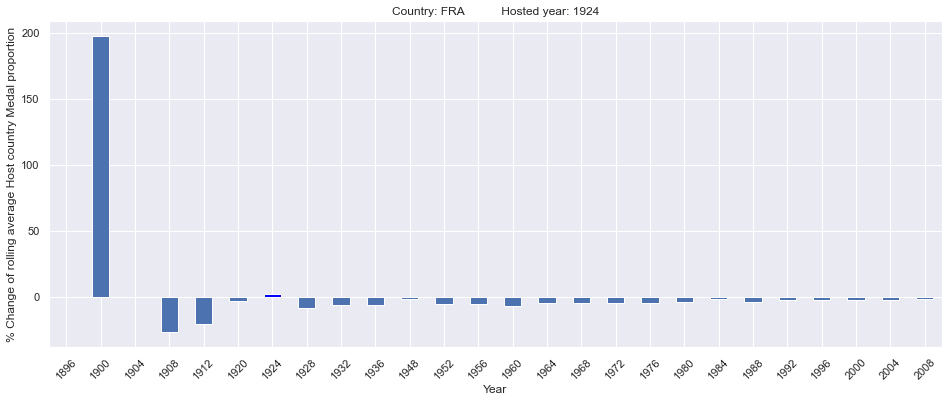

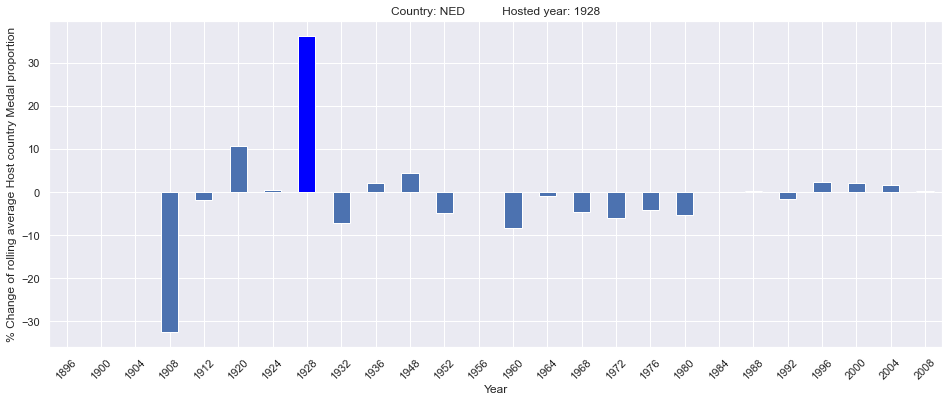

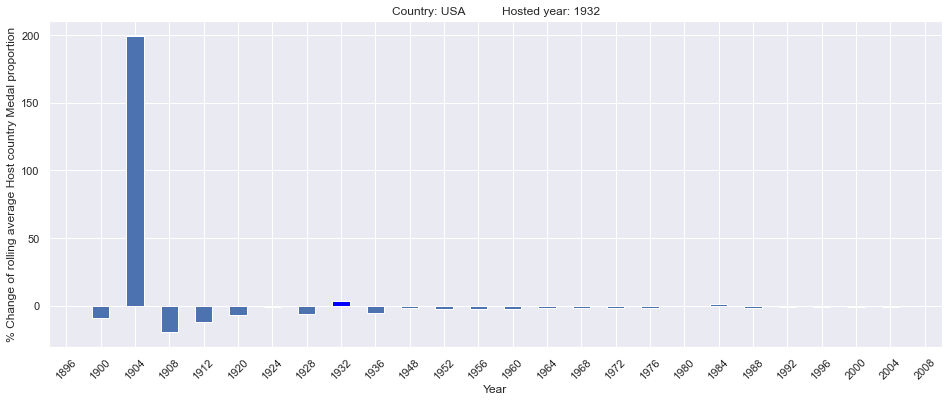

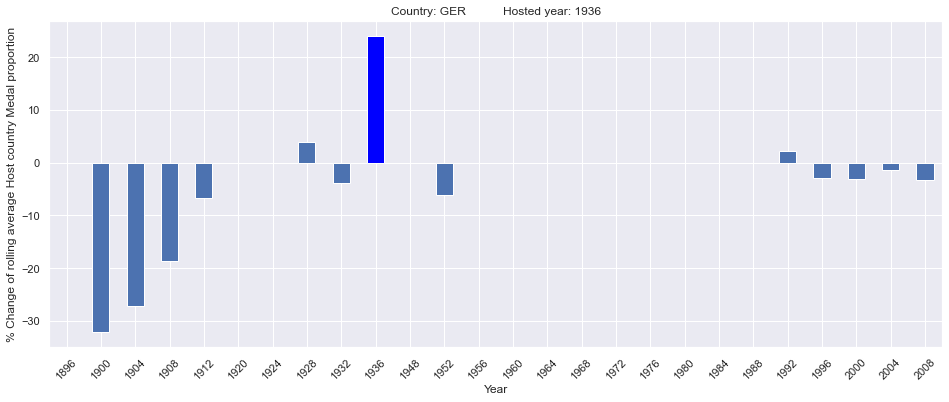

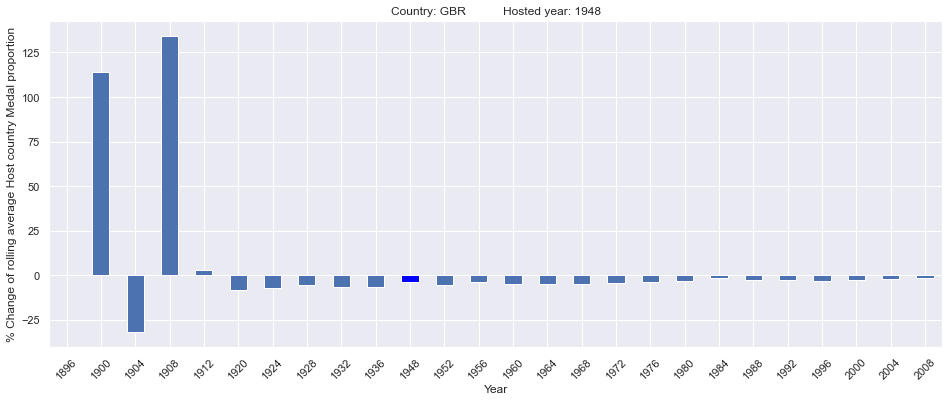

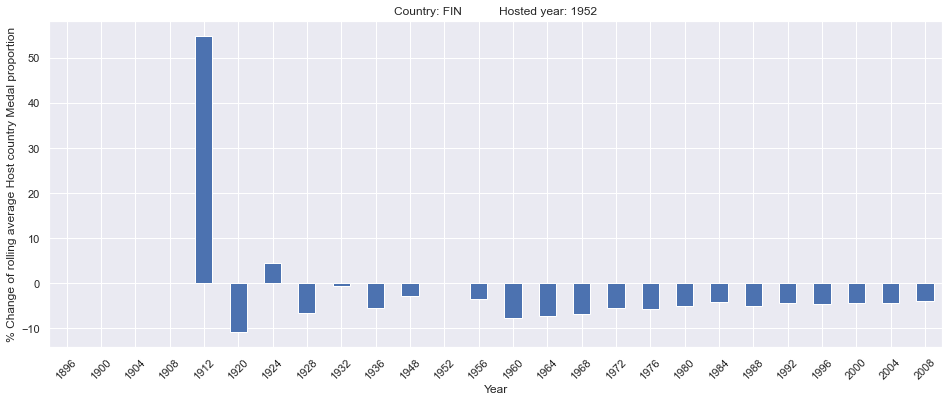

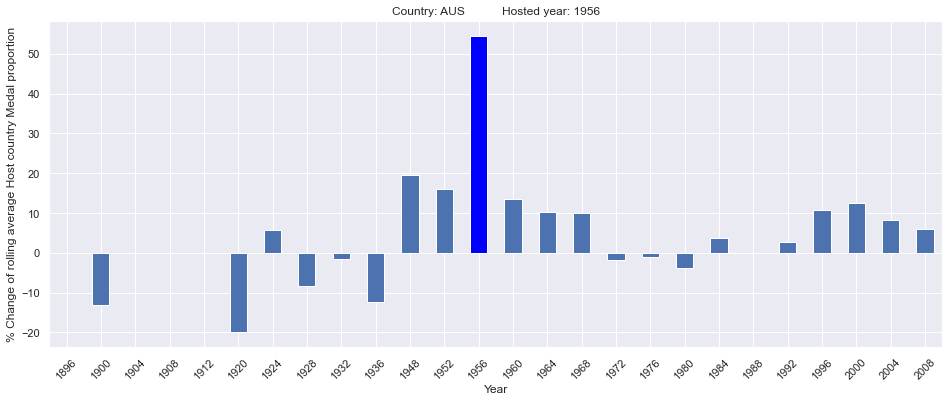

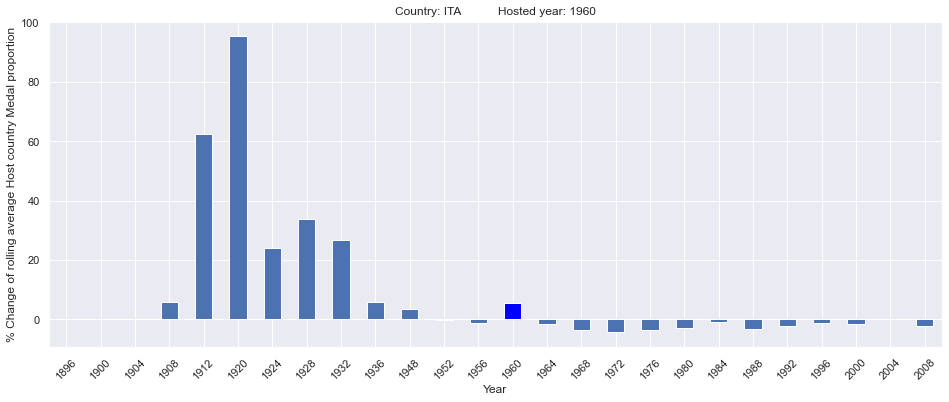

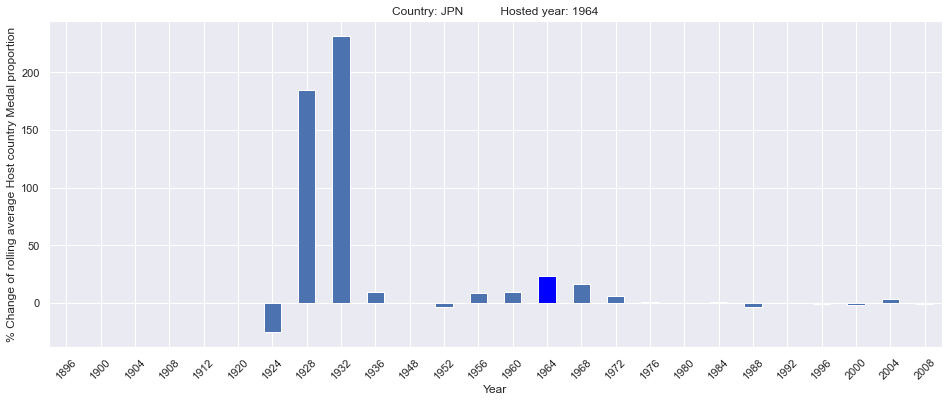

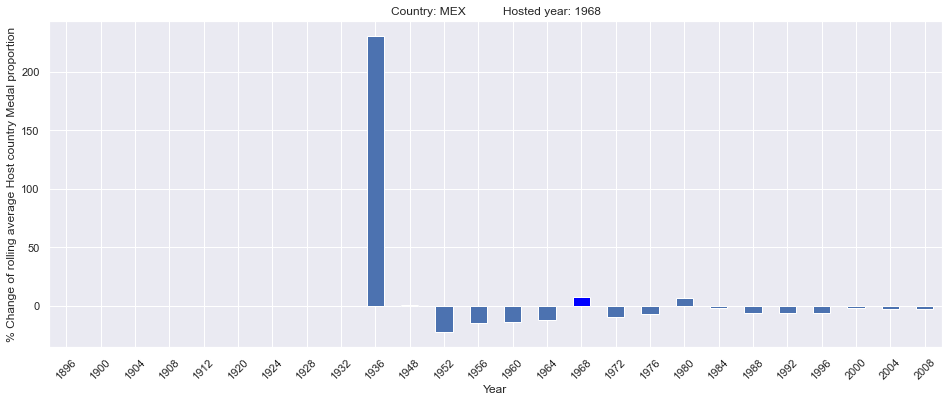

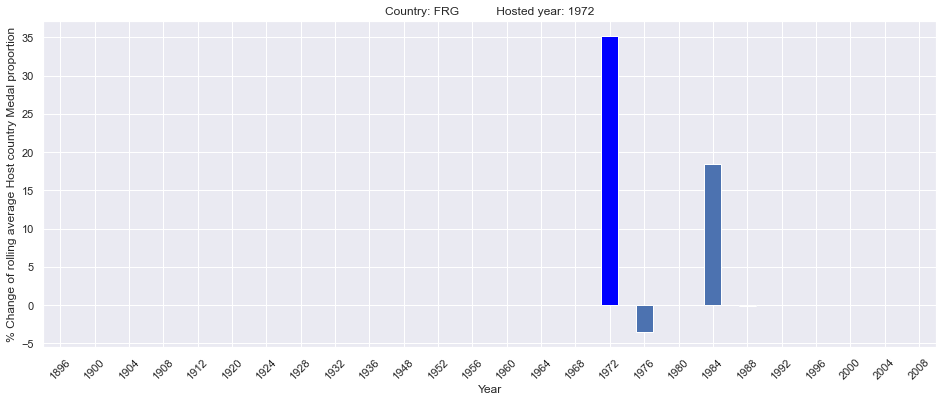

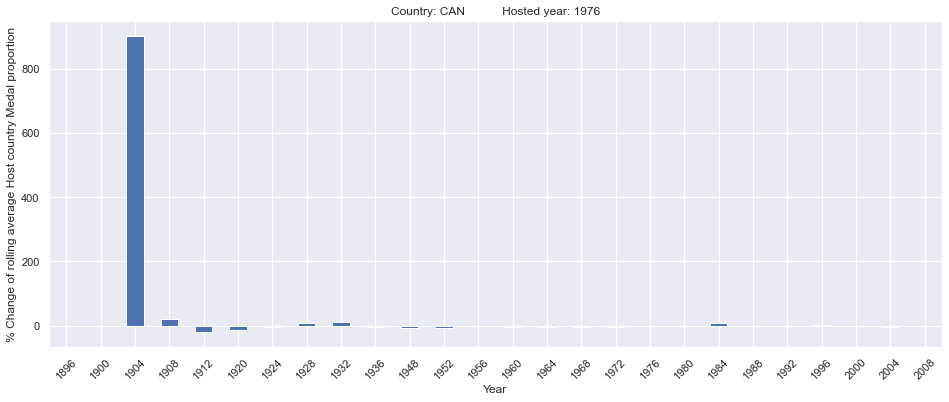

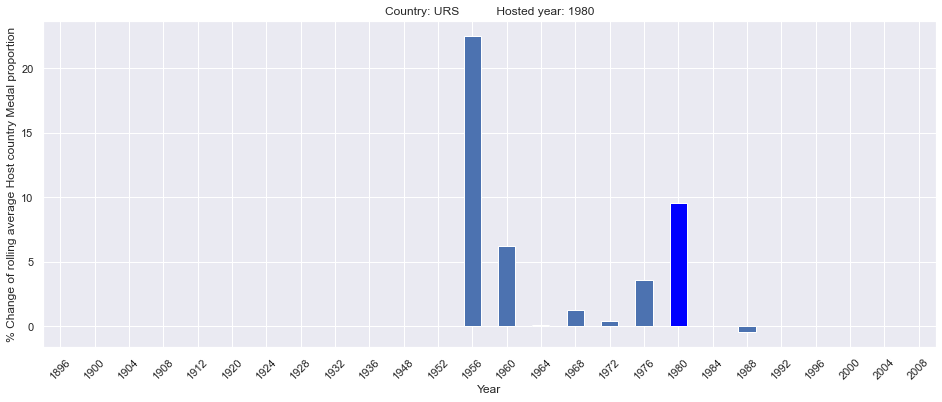

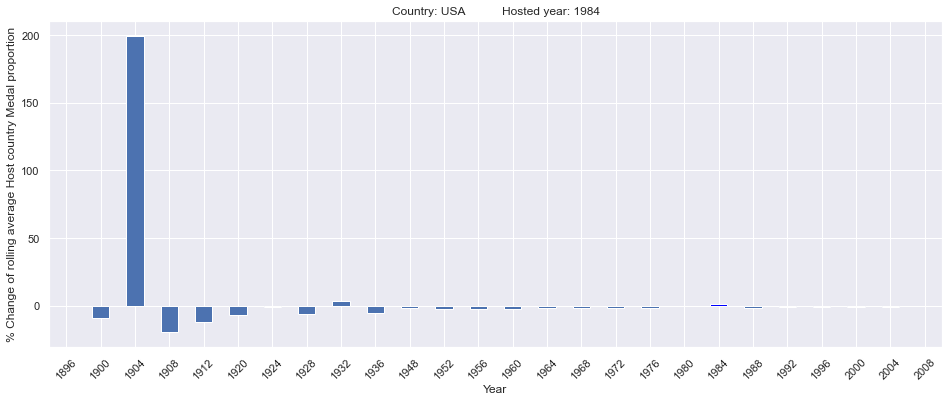

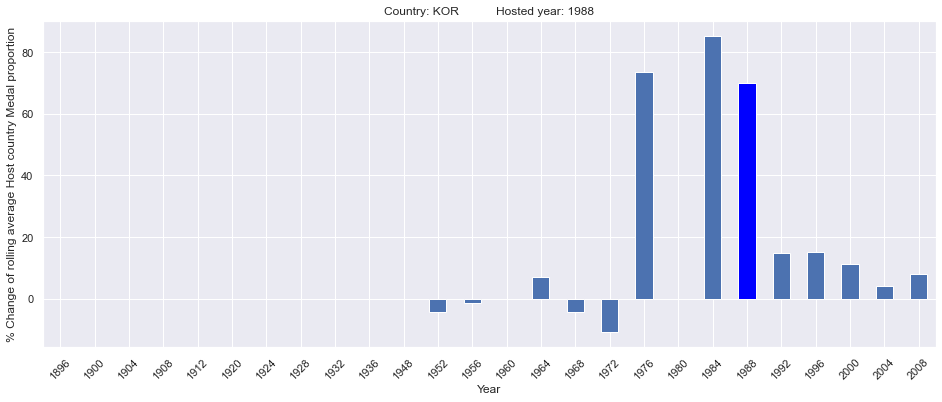

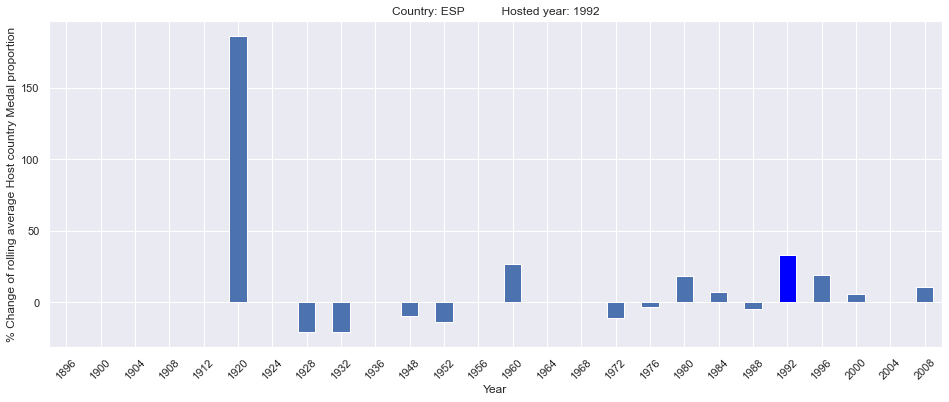

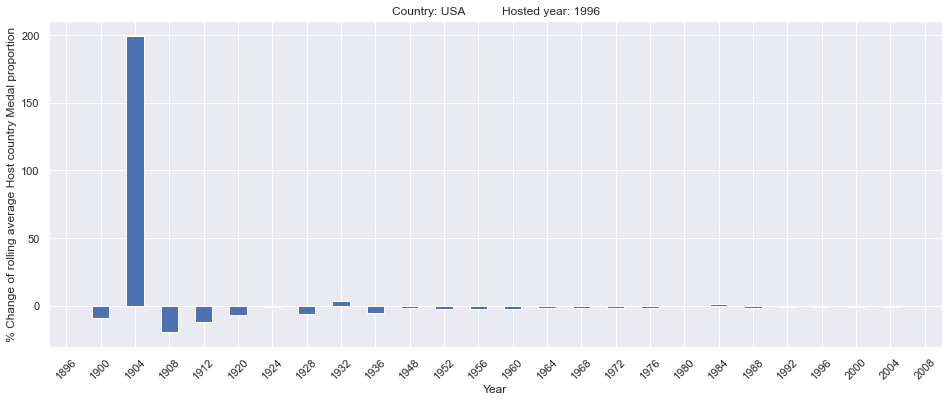

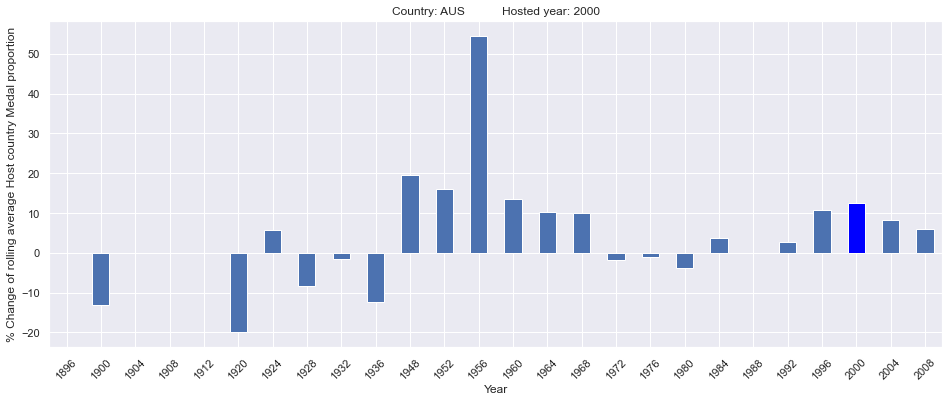

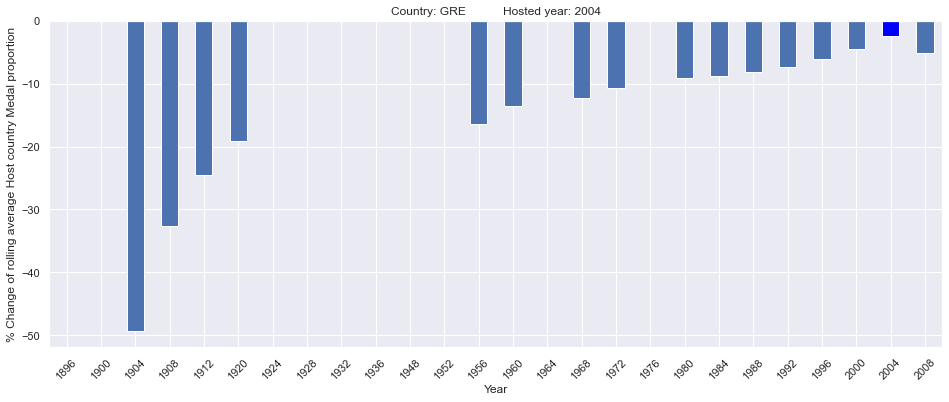

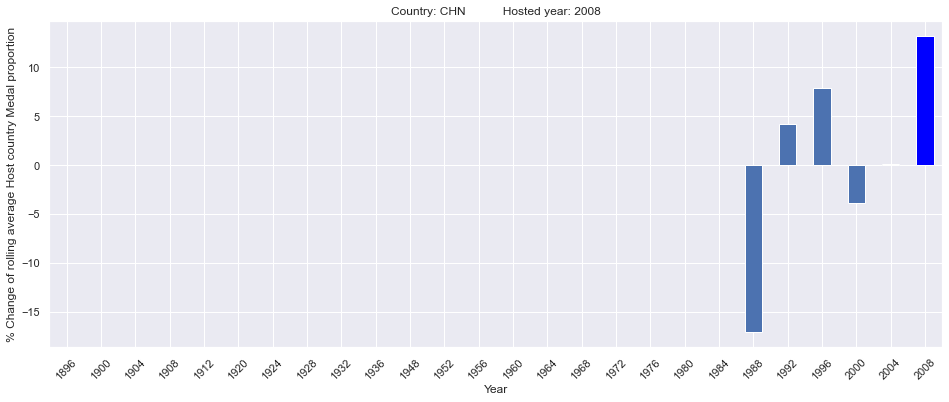

In [10]:
for i in list(hosts['Edition']):
    row = hosts[hosts.Edition==i]
    country, year_win= row.NOC.values[0], row.Edition.values[0]
    yearhost = reshaped[reshaped['NOC']==row.NOC.values[0]].set_index('Edition')

    y = x[['Edition',country]]
    colorarray = []
    for e in y.Edition:
        if e==year_win:
            colorarray.append('blue')
        else:
            colorarray.append('C0')
    
    plt.figure(figsize=(16, 6))
    ax = yearhost['value'].plot(kind='bar', color = colorarray)
    ax.set_title(f"Country: {country}           Hosted year: {year_win}")
    ax.set_xlabel("Year")
    ax.set_xticklabels(influence['value'].index, rotation=45)
    ax.set_ylabel("% Change of rolling average Host country Medal proportion")
    #plt.savefig(f"host chart {year_win}.jpg")
    plt.show()
    print("\n\n")